In [1]:
#Importing Libraries used
import numpy as np
import glob 
from PIL import Image,ImageOps
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
train_files = glob.glob("./archive/flowers/*/**") # Finding all the images in the subdirectories also

In [3]:
len(train_files) #Total Images of all types

15740

In [4]:
from random import shuffle # randomly shuffling the image data set so that same type of images are not present consecutively
shuffle(train_files)       # as they are present in the train_files array

In [5]:
# Images have different shapes, but all are RGB
np.array(Image.open(train_files[0])).shape

(256, 256, 3)

In [6]:
# Initialising the numpy matrix to store the data. We need to resize each image to 256x256, grayscale
X_train = np.zeros((len(train_files),28,28))
y_train = np.zeros(((len(train_files),1)))

In [7]:
for i in range(len(train_files)):
    # For finding the type of flowers, and labeling it.
    temp = train_files[i].split('\\')[1]
    y_value=0;
    if(temp=='astilbe'): y_value=0
    elif(temp=='bellflower'): y_value=1
    elif(temp=='black_eyed_susan'): y_value=2
    elif(temp=='calendula'): y_value=3
    elif(temp=='california_poppy'): y_value=4
    elif(temp=='carnation'): y_value=5
    elif(temp=='common_daisy'): y_value=6
    elif(temp=='coreopsis'): y_value=7
    elif(temp=='daffodil'): y_value=8
    elif(temp=='dandelion'): y_value=9
    elif(temp=='iris'): y_value=10
    elif(temp=='magnolia'): y_value=11
    elif(temp=='rose'): y_value=12
    elif(temp=='sunflower'): y_value=13
    elif(temp=='tulip'): y_value=14
    elif(temp=='water_lily'): y_value=15

    # converting into grayscale
    gray = ImageOps.grayscale(Image.open(train_files[i]))
    # resizing each image 
    image_reshape = gray.resize((28,28),0)
    # putting it in the numpy matrix
    X_train[i,:,:] = np.array(image_reshape)/255
    y_train[i] = y_value
        
# 0- for astilbe, 1- bellflower, 2-black_eyed susan, 3-calendula, 4-california_poppy, 
# 5-carnation, 6-common_daisy, 7-coreopsis, 8-daffodil, 9-dandelion, 10-iris, 11-magnolia,
# 12-rose, 13-sunflower, 14-tulip, 15-water_lily

In [8]:
X_train=np.reshape(X_train,(X_train.shape[0],28,28,1))

[8.]


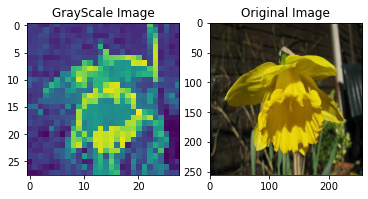

In [9]:
# GrayScale Image
plt.subplot(1,2,1)
plt.imshow(X_train[0])
plt.title("GrayScale Image")
# The original Image
plt.subplot(1,2,2)
ex = Image.open(train_files[0])
plt.title("Original Image")
plt.imshow(ex)
# Labeling
print(y_train[0]) # 1 represents bellflower

In [10]:
# X_train= X_train/255.0

In [11]:
#two types selectors functions: 1. INT  2. Choice
def build_model(hp):  
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),#min value of filter you want
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),#picks like mcq
        activation='relu',
        input_shape=(28,28,1)
    ),
      #for i in range(0,hp.Int(....)) this will also work
    tf.keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),# ihave added this line extra in comparison to the old model
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    tf.keras.layers.Dense(16, activation='softmax')
  ])
  
  model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [12]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
#hyprer/paramter tuning

In [13]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Flower")

INFO:tensorflow:Reloading Oracle from existing project output\Flower\oracle.json
INFO:tensorflow:Reloading Tuner from output\Flower\tuner0.json


In [14]:
tuner_search.search(X_train,y_train,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 03m 05s]
val_accuracy: 0.23951715230941772

Best val_accuracy So Far: 0.33926302194595337
Total elapsed time: 00h 08m 12s
INFO:tensorflow:Oracle triggered exit


In [15]:
model=tuner_search.get_best_models(num_models=1)[0]

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 48)        20784     
                                                                 
 flatten (Flatten)           (None, 27648)             0         
                                                                 
 dense (Dense)               (None, 112)               3096688   
                                                                 
 dense_1 (Dense)             (None, 16)                1808      
                                                                 
Total params: 3,119,760
Trainable params: 3,119,760
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
443/443 [==============================] - 29s 66ms/step - loss: 0.5678 - accuracy: 0.8371 - val_loss: 1.3226 - val_accuracy: 0.6131
Epoch 2/10
443/443 [==============================] - 29s 66ms/step - loss: 0.2069 - accuracy: 0.9468 - val_loss: 1.6288 - val_accuracy: 0.5845
Epoch 3/10
443/443 [==============================] - 29s 66ms/step - loss: 0.0795 - accuracy: 0.9845 - val_loss: 1.9497 - val_accuracy: 0.5712
Epoch 4/10
443/443 [==============================] - 30s 67ms/step - loss: 0.0424 - accuracy: 0.9929 - val_loss: 2.1530 - val_accuracy: 0.5693
Epoch 5/10
443/443 [==============================] - 29s 66ms/step - loss: 0.0351 - accuracy: 0.9932 - val_loss: 2.3582 - val_accuracy: 0.5388
Epoch 6/10
443/443 [==============================] - 30s 67ms/step - loss: 0.0560 - accuracy: 0.9864 - val_loss: 2.2893 - val_accuracy: 0.5070
Epoch 7/10
443/443 [==============================] - 29s 66ms/step - loss: 0.0612 - accuracy: 0.9837 - val_loss: 2.6046 - val_accuracy:

In [53]:
X_train2=X_train.reshape((X_train.shape[0],1,28,28,1))

In [54]:
np.argmax(model.predict(X_train2[0]))==y_train[0]

1/1 [==============================] - 0s 34ms/step


array([ True])

In [55]:
import random

In [56]:
list_name = ['astilbe','bellflower','black_eyed susan', 'calendula', 'california_poppy','carnation','common_daisy','coreopsis','daffodil','dandelion','iris','mongolia','rose','sunflower','tulip','water_lily']

1/1 [==============================] - 0s 6ms/step


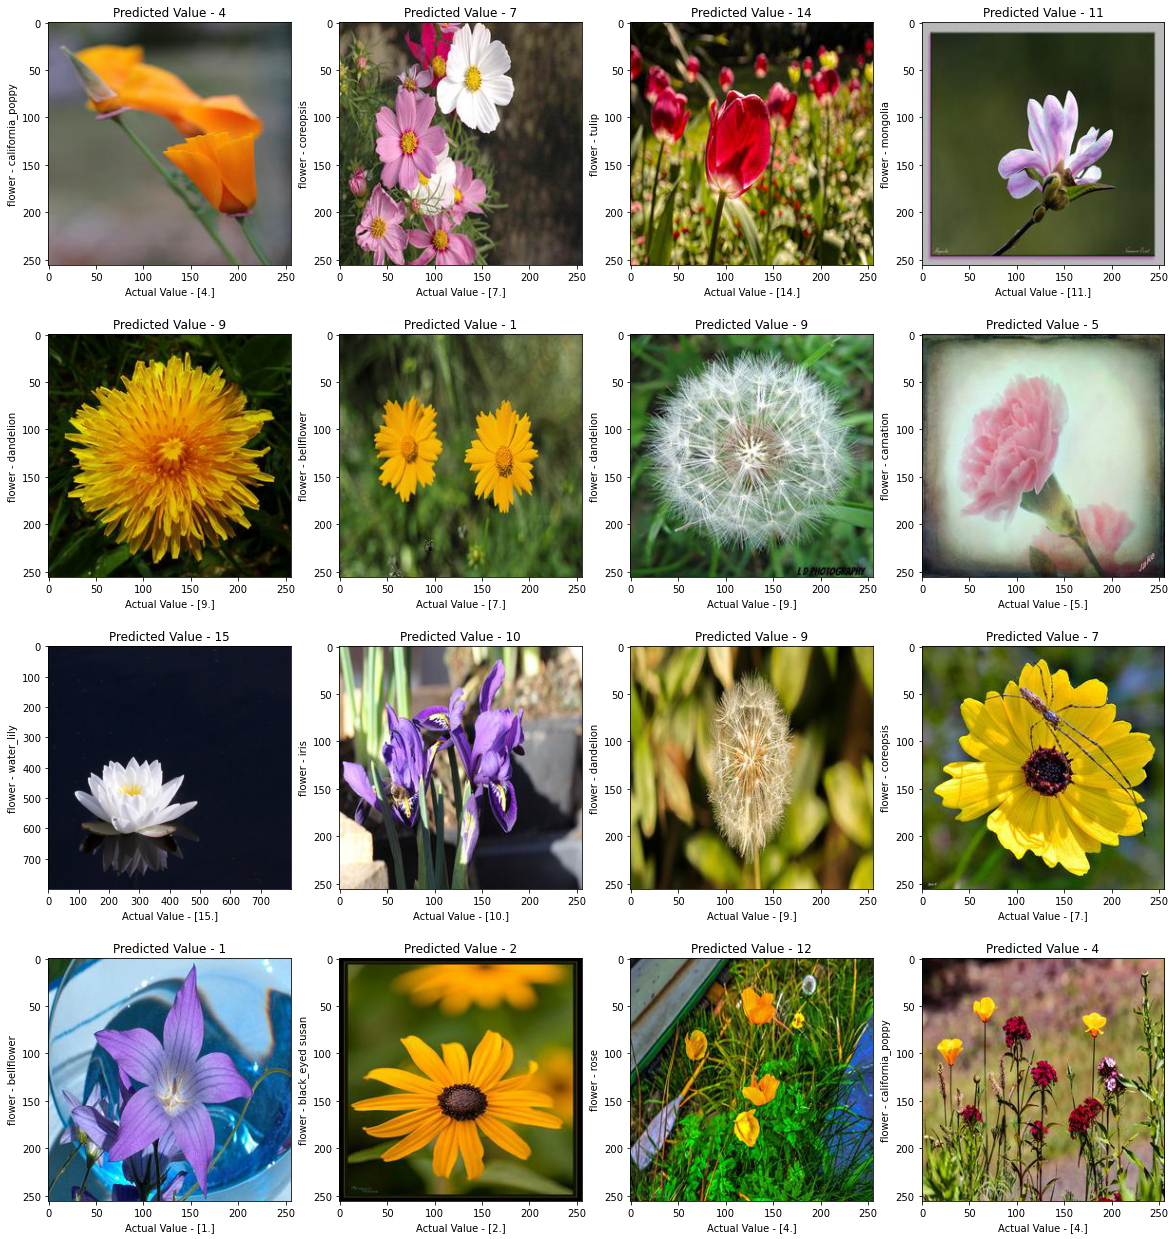

In [65]:
plt.figure(figsize=(20,22))
for i in range(0,16):
    temp = random.randint(0, X_train.shape[0])
    plt.subplot(4,4,i+1)
    plt.imshow(Image.open(train_files[temp]))
    plt.title("Predicted Value - {0}".format(np.argmax(model.predict(X_train2[temp]))))
    plt.xlabel("Actual Value - {0}".format(y_train[temp]))
    plt.ylabel('flower - {0}'.format(list_name[np.argmax(model.predict(X_train2[temp]))]))